In [140]:
from tensorflow.keras.layers import Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [141]:
df = pd.read_csv('/content/formspring_data.csv',delimiter='\t',quoting=3)

In [142]:
a = df['ans1'] == df['ans2']
b = df['ans2'] == df['ans3']
c = df['ans3'] == df['ans1']

In [143]:
df = df[a & b & c]

In [144]:
df = df[df['ans1'].notna()]

In [145]:
df

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,<3,</3 ? haha jk! <33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,(:,;(,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,******************MEOWWW*************************,*RAWR*?,None,No,0,NaN,No,0,NaN,No,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,outlaw9000,Q: Your parents are divorced. One of them gets...,Your parents are divorced. One of them gets ma...,Not incest because we would not be related s...,None,No,0,NaN,No,0,NaN,No,0,NaN
12891,outlaw9000,Q: Youre at a party and your friend who drove ...,Youre at a party and your friend who drove you...,take the battery cable off and make her sta...,None,No,0,NaN,No,0,NaN,No,0,NaN
12892,outlaw9000,Q: Youu2019re awesome :] Give yourself a compl...,Youu2019re awesome :] Give yourself a complime...,thank you ! ! I AM Awesome ! !,None,No,0,None,No,0,NaN,No,0,NaN
12893,outlaw9000,Q: Yu play with yurself ?<br>A: all the time. ...,Yu play with yurself ?,all the time. sometimes more than once a day,None,No,0,NaN,No,0,NaN,No,0,NaN


In [146]:
df = df[['ques','ans1']]

In [147]:
df.shape

(11056, 2)

In [148]:
df['ques'] = df['ques'].str.replace('&#039;',"'")
df['ques'] = df['ques'].str.replace('&quot;','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [149]:
df['ques'] = df['ques'].str.replace('<br>','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
df['ans1'] = df['ans1'].replace(("Yes","No"),(1,0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
df = df.dropna()

In [152]:
df.shape

(11054, 2)

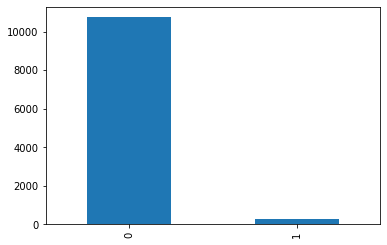

In [153]:
df['ans1'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [154]:
df['ans1'].value_counts()

0    10747
1      307
Name: ans1, dtype: int64

In [155]:
import re
def clean_words(words):
  words = re.sub('[^a-zA-Z]',' ',words.lower())
  cleaned_words = words.split()
  words = [word for word in cleaned_words if not word in set(stopwords.words('english'))] 
  sentence = ' '.join(words)
  return sentence

In [156]:
df['ques'] = df['ques'].apply(clean_words)

In [157]:
tokenizer = Tokenizer(num_words=20000)

In [163]:
X = df['ques'].values
tokenizer.fit_on_texts(X)
print(tokenizer.word_index)

{'u': 1, 'would': 2, 'like': 3, 'ever': 4, 'apos': 5, 'think': 6, 'lol': 7, 'know': 8, 'love': 9, 'r': 10, 'one': 11, 'get': 12, 'people': 13, 'go': 14, 'im': 15, 'want': 16, 'favorite': 17, 'someone': 18, 'ur': 19, 'haha': 20, 'time': 21, 'could': 22, 'last': 23, 'thing': 24, 'life': 25, 'person': 26, 'p': 27, 'say': 28, 'really': 29, 'good': 30, 'name': 31, 'amp': 32, 'questions': 33, 'many': 34, 'right': 35, 'dont': 36, 'back': 37, 'day': 38, 'make': 39, 'best': 40, 'going': 41, 'something': 42, 'first': 43, 'feel': 44, 'tell': 45, 'see': 46, 'got': 47, 'spam': 48, 'much': 49, 'song': 50, 'ask': 51, 'girl': 52, 'well': 53, 'whats': 54, 'way': 55, 'hey': 56, 'believe': 57, 'friend': 58, 'things': 59, 'still': 60, 'anyone': 61, 'anything': 62, 'sex': 63, 'hate': 64, 'question': 65, 'xd': 66, 'night': 67, 'fake': 68, 'live': 69, 'kind': 70, 'take': 71, 'oh': 72, 'look': 73, 'never': 74, 'friends': 75, 'rather': 76, 'girls': 77, 'pretty': 78, 'movie': 79, 'today': 80, 'come': 81, 'guys'

In [164]:
len(tokenizer.word_index)
X = tokenizer.texts_to_sequences(X)
X = sequence.pad_sequences(X,maxlen=250)

In [165]:
y = df['ans1'].values.astype(int)

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [167]:
model = Sequential()
model.add(Embedding(20000,120))
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [168]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [169]:
history = model.fit(X_train,y_train,batch_size=45,epochs=2,verbose=2,validation_data=(X_test,y_test))

Epoch 1/2
185/185 - 13s - loss: 0.1904 - accuracy: 0.9650 - val_loss: 0.1222 - val_accuracy: 0.9740
Epoch 2/2
185/185 - 12s - loss: 0.1303 - accuracy: 0.9717 - val_loss: 0.1239 - val_accuracy: 0.9740


In [170]:
score,accuracy = model.evaluate(X_test,y_test,batch_size=45,verbose=2)

62/62 - 1s - loss: 0.1239 - accuracy: 0.9740


In [171]:
test_sentence = ['You are a stupid bitch']

In [182]:
def pre(sentence):
  seq = tokenizer.texts_to_sequences(sentence)
  padded_seq = sequence.pad_sequences(seq,maxlen=250)
  pred = model.predict(padded_seq)
  pred = pred[0][-1][0]
  result = "This sentence has a "+str(pred)+" probability of containing cyberbullying content"
  print(result)

In [183]:
pre(test_sentence)

This sentence has a 0.6971345 probability of containing cyberbullying content


In [184]:
pre(['You are a terrible liar'])

This sentence has a 0.05878806 probability of containing cyberbullying content


In [185]:
pre(['Why are you stupid?'])

This sentence has a 0.44257444 probability of containing cyberbullying content


In [186]:
pre(['Hello How are you doing?'])

This sentence has a 0.028066188 probability of containing cyberbullying content


In [187]:
pre(['I"m going to kill you and your family'])

This sentence has a 0.022852153 probability of containing cyberbullying content


In [188]:
pre(['You are a punkass'])

This sentence has a 0.038723677 probability of containing cyberbullying content


In [189]:
pre(['you are a fucked up bitch !'])

This sentence has a 0.6971345 probability of containing cyberbullying content


In [190]:
import h5py
model_json = model.to_json()
with open("mlp_model.json", "w") as json_file:
    json_file.write(model_json)
